In [2]:
from StackGP import *
import numpy as np

In [106]:
inputData=np.array([np.random.uniform(size=10),np.random.uniform(size=10),np.random.uniform(size=10)])
responseData=np.sin(inputData[0]*inputData[1])/(1-inputData[2])

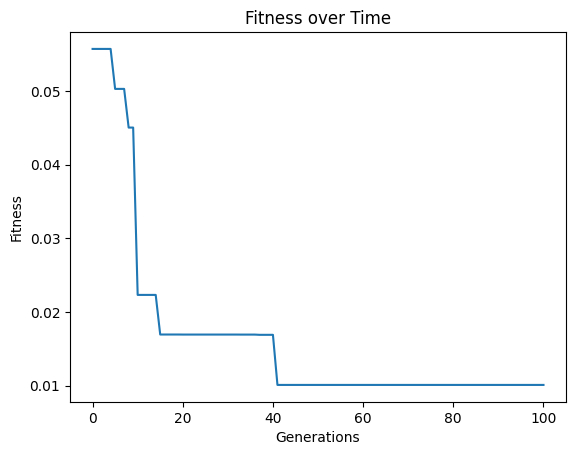

In [107]:
models=evolve(inputData,responseData,ops=allOps(),generations=100,tracking=True)

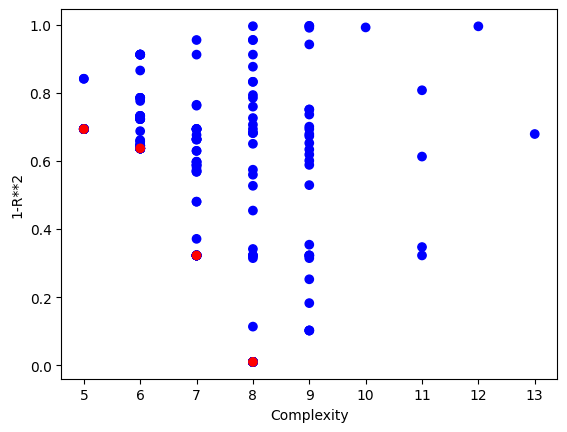

In [108]:
plotModels(models)

In [109]:
printGPModel(models[0])

0.40715620596678*tan(asin(x2)**2) + 0.41498322491758

In [110]:
models[0]

[array([<function arcsin at 0x1585030d0>, <function sqrd at 0x158500d30>,
        <function tan at 0x158500f70>, <function mult at 0x158500af0>,
        <function add at 0x1585009d0>], dtype=object),
 [<function StackGP.variableSelect.<locals>.<lambda>(variables)>,
  0.40715620596678,
  0.41498322491758],
 [0.010095860754839703, 8]]

In [3]:
def sharpnessConstants(model,inputData,responseData,numPerturbations=10,percentPerturbation=0.2):

    fits=[]

    #For each model parameter, if numeric, randomly perturb by x% and see how much the model changes
    for i in range(numPerturbations):
        tempModel=copy.deepcopy(model)
        newParameters=[param if callable(param) else param*(1+percentPerturbation*(np.random.uniform()-0.5)) for param in model[1]]
        tempModel[1]=newParameters
        fits.append(fitness(tempModel,inputData,responseData))
    return np.std(fits)
        

In [172]:
sharpnessConstants(models[0],inputData,responseData,numPerturbations=100)

0.0010716355236378141

There number of repetitions needed to converge to a sharpness may need to be dynamic dependend on the model. 

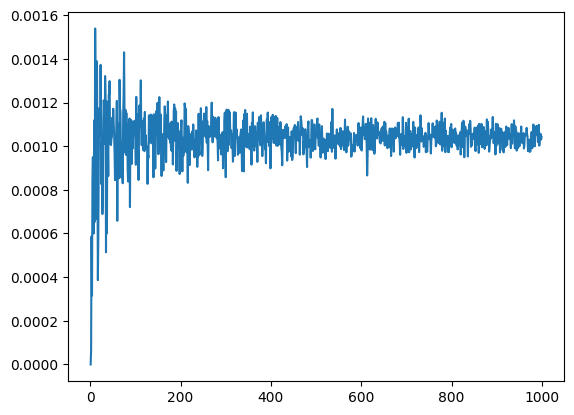

In [175]:
plt.plot([sharpnessConstants(models[0],inputData,responseData,numPerturbations=i) for i in range(1000)])

In [294]:
def sharpnessData(model,inputData,responseData,numPerturbations=10,percentPerturbation=0.2):

    fits=[]

    #For each vector, randomly perturb by x% of the standard deviation and see how much the model fitness changes
    for i in range(numPerturbations):
        tempData=copy.deepcopy(inputData)
        tempData=np.array([(vec+percentPerturbation*np.std(vec)*(np.random.uniform(size=len(vec))-0.5)) for vec in tempData])
        fits.append(fitness(model,tempData,responseData))
    return np.std(fits)

In [188]:
sharpnessData(models[0],inputData,responseData)

0.0025907725039754992

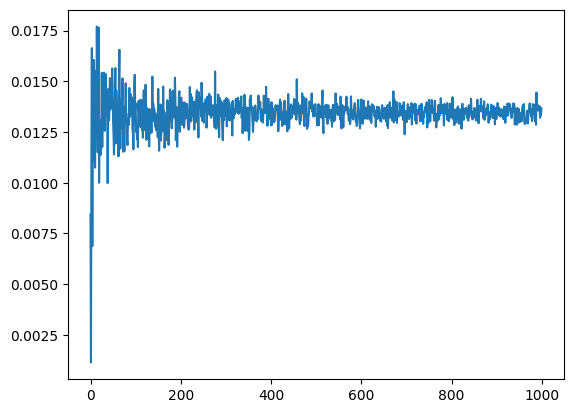

In [256]:
plt.plot([sharpnessData(models[0],inputData,responseData,numPerturbations=i+2) for i in range(1000)])

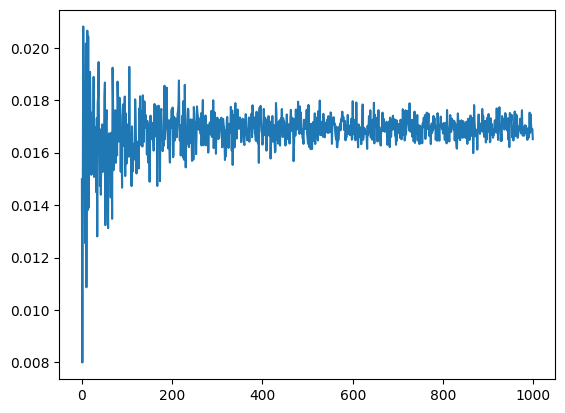

In [257]:
plt.plot([totalSharpness(models[0],inputData,responseData,numPerturbations=i+4) for i in range(1000)])

In [291]:
l1=[totalSharpness(mod,inputData,responseData,numPerturbations=100,percentPerturbation=0.8) for mod in models]
l2=[totalSharpness(mod,inputData,responseData,numPerturbations=10,percentPerturbation=0.8) for mod in models]

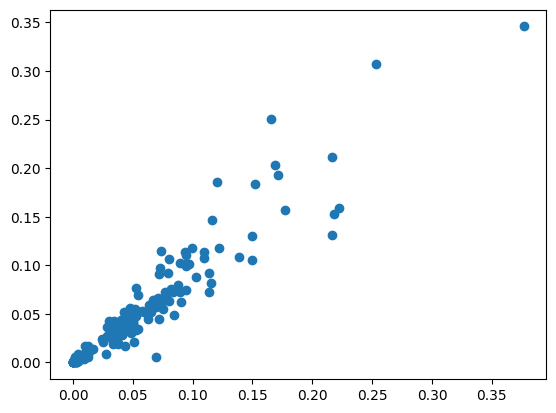

In [292]:
plt.plot(l1,l2,'o')

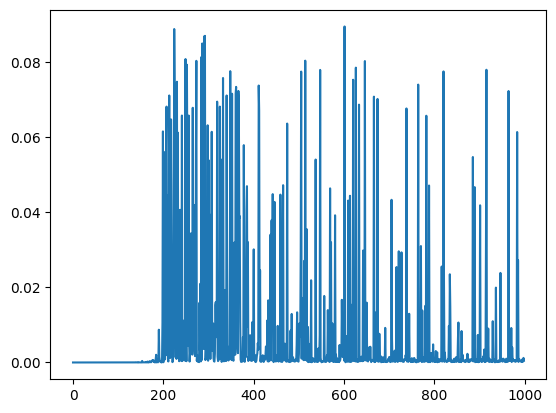

In [369]:
plt.plot([sharpnessConstants(models[-1],inputData,responseData,percentPerturbation=i,numPerturbations=30) for i in np.arange(0.01,10,0.01)])

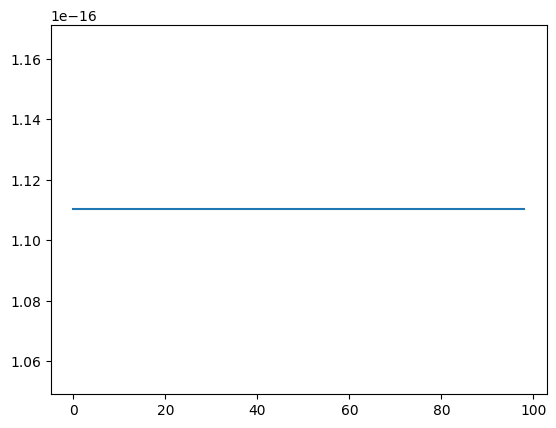

In [340]:
plt.plot([sharpnessConstants(models[-1],inputData,responseData,percentPerturbation=i) for i in np.arange(0.01,1,0.01)])

In [373]:
def totalSharpness(model,inputData,responseData,numPerturbations=10,percentPerturbation=0.2):

    return sharpnessConstants(model,inputData,responseData,numPerturbations=numPerturbations,percentPerturbation=percentPerturbation)+sharpnessData(model,inputData,responseData,numPerturbations=numPerturbations,percentPerturbation=percentPerturbation)

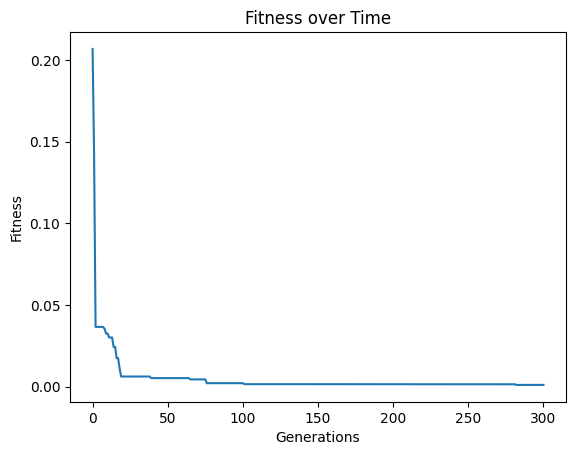

In [144]:
models=evolve(inputData,responseData,modelEvaluationMetrics=[fitness,totalSharpness],generations=300,align=False,tourneySize=30,ops=allOps(),tracking=True,elitismRate=10)

In [132]:
print(printGPModel(models[0]),"\n",printGPModel(models[1]),"\n",printGPModel(models[2]))

acos(-atan(tanh(tanh(exp(-x0)) - acos(tanh(x0*asin(x2)**2))/tanh(atan(sqrt(x1))))))**2 
 acos(-atan(tanh(tanh(exp(-x0)) - acos(tanh(x0*asin(x2)**2))/tanh(atan(sqrt(x1))))))**2 
 sqrt(-atan(tanh(tanh(exp(-x0)) - acos(tanh(x0*asin(x2)**2))/tanh(atan(sqrt(x1))))))


In [11]:
def deleteDuplicateModelsPhenotype2(models): #Removes any models that are the same, does not consider simplified form
    uniqueMods = [printGPModel(models[0])]
    remainingMods=[printGPModel(mod) for mod in models[1:]]
    uniquePos = [0]
    currPos=1
    for mod in remainingMods:
        test=False
        for checkMod in uniqueMods:
            if mod==checkMod:
                test=True
        if not test:
            uniqueMods.append(mod)
            uniquePos.append(currPos)
        currPos+=1
    
    return [models[i] for i in uniquePos]

In [133]:
len(models)

278

In [134]:
printGPModel(models[0])

acos(-atan(tanh(tanh(exp(-x0)) - acos(tanh(x0*asin(x2)**2))/tanh(atan(sqrt(x1))))))**2

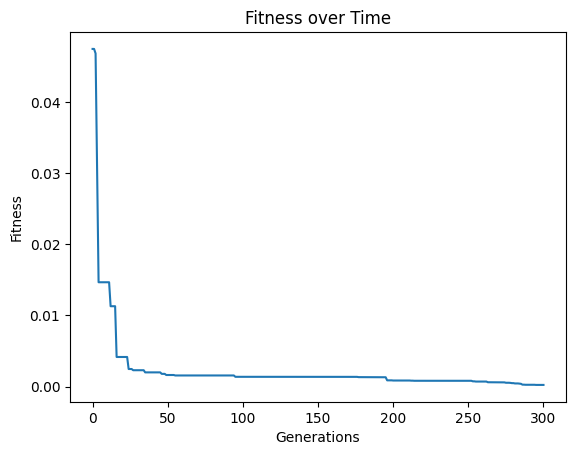

In [145]:
modelsAlt=evolve(inputData,responseData,generations=300,align=False,ops=allOps(),tracking=True,elitismRate=10,tourneySize=30)

In [136]:
printGPModel(modelsAlt[0])

x1*sin(x0)/atan(atan(log(x2)))

In [146]:
len(modelsAlt)

211

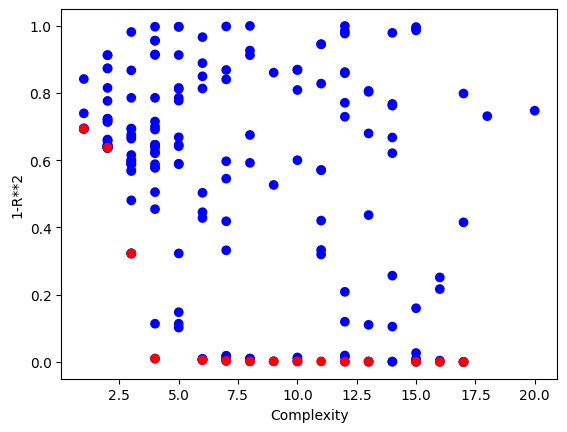

In [147]:
plotModels(modelsAlt)

In [148]:
models[0]

[array(['pop', <function sqrd at 0x158500d30>,
        <function arctan at 0x158503160>, <function sqrd at 0x158500d30>,
        <function sin at 0x158500e50>, <function arcsin at 0x1585030d0>,
        'pop', <function mult at 0x158500af0>,
        <function arctan at 0x158503160>, 'pop',
        <function arcsin at 0x1585030d0>, <function arctan at 0x158503160>,
        <function add at 0x1585009d0>, <function sqrt at 0x158500ca0>,
        <function tan at 0x158500f70>, <function sqrd at 0x158500d30>,
        <function exp at 0x158500b80>], dtype=object),
 [<function StackGP.variableSelect.<locals>.<lambda>(variables)>,
  <function StackGP.variableSelect.<locals>.<lambda>(variables)>,
  <function StackGP.variableSelect.<locals>.<lambda>(variables)>],
 [0.0011272565673331458, 0.00477148464189911]]

In [149]:
modelsAlt[0]

[array(['pop', <function sqrd at 0x158500d30>, 'pop',
        <function sin at 0x158500e50>, 'pop',
        <function tanh at 0x1585031f0>, 'pop',
        <function sub at 0x158500a60>, <function add at 0x1585009d0>,
        <function add at 0x1585009d0>, <function tanh at 0x1585031f0>,
        <function inv at 0x158500dc0>, 'pop', 'pop',
        <function add at 0x1585009d0>,
        <function protectDiv at 0x10c466310>,
        <function arccos at 0x158503040>], dtype=object),
 [<function StackGP.variableSelect.<locals>.<lambda>(variables)>,
  <function StackGP.variableSelect.<locals>.<lambda>(variables)>,
  <function StackGP.variableSelect.<locals>.<lambda>(variables)>,
  2.6115224717660412,
  10.327968094519134,
  <function StackGP.variableSelect.<locals>.<lambda>(variables)>],
 [0.0002520875778803111, 17]]

In [150]:
totalSharpness(modelsAlt[0],inputData,responseData)

nan

In [151]:
[setModelQuality(mod,inputData,responseData,modelEvaluationMetrics=[fitness,totalSharpness]) for mod in models];
[setModelQuality(mod,inputData,responseData,modelEvaluationMetrics=[fitness,stackGPModelComplexity]) for mod in modelsAlt];

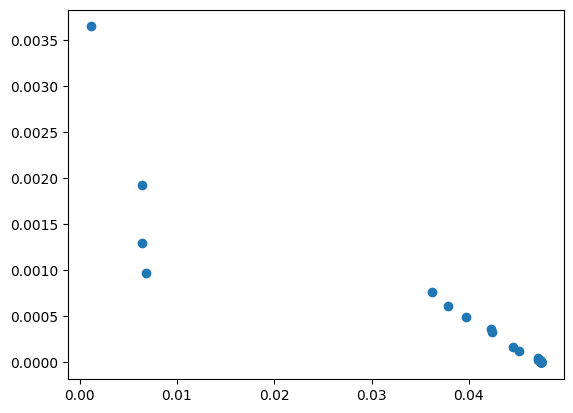

In [155]:
plt.plot([mod[2][0] for mod in paretoTournament(models)],[mod[2][1] for mod in paretoTournament(models)],'o')

In [201]:
inputTest=np.array([np.random.uniform(0,1.5,size=100),np.random.uniform(0,1.5,size=100),np.random.uniform(0,1.5,size=100)])
responseTest=np.sin(inputTest[0]*inputTest[1])/(1-inputTest[2])

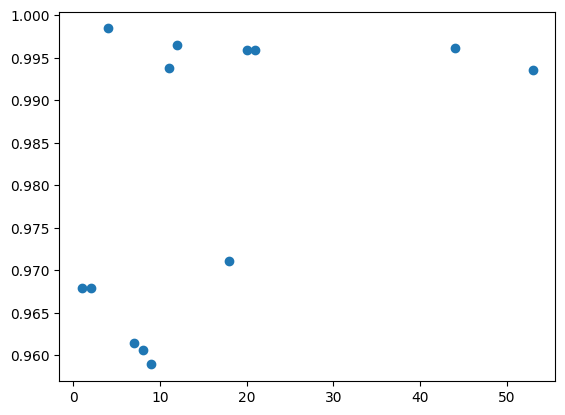

In [202]:
plt.plot([fitness(mod,inputTest,responseTest) for mod in paretoTournament(models)],'o')

In [203]:
printGPModel(paretoTournament(modelsAlt)[12])

1/log(x2)

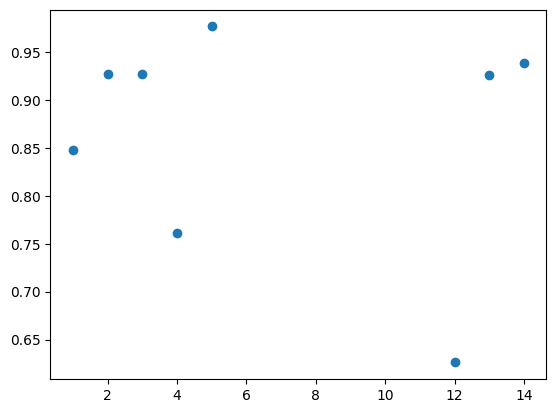

In [204]:
plt.plot([fitness(mod,inputTest,responseTest) for mod in paretoTournament(modelsAlt)],'o')

In [205]:
fitness(models[0],inputTest,responseTest)

nan

In [206]:
fitness(modelsAlt[0],inputTest,responseTest)

nan

## Testing

In [257]:
inputData=np.array([np.random.uniform(size=10),np.random.uniform(size=10),np.random.uniform(size=10)])
responseData=(inputData[0]*inputData[1])/(1-inputData[2])

inputVal=np.array([np.random.uniform(0,1.5,size=10),np.random.uniform(0,1.5,size=10),np.random.uniform(0,1.5,size=10)])
responseVal=(inputVal[0]*inputVal[1])/(1-inputVal[2])

inputTest=np.array([np.random.uniform(0,1.5,size=100),np.random.uniform(0,1.5,size=100),np.random.uniform(0,1.5,size=100)])
responseTest=(inputTest[0]*inputTest[1])/(1-inputTest[2])

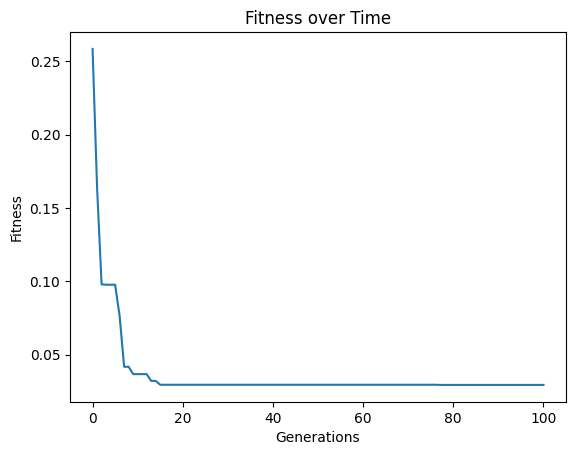

In [258]:
samModel=evolve(inputData,responseData,generations=100,ops=allOps(),tracking=True,elitismRate=10,modelEvaluationMetrics=[fitness,totalSharpness],align=False,tourneySize=30)

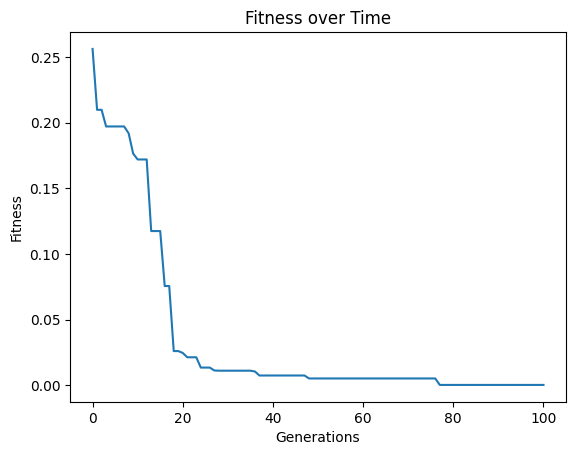

In [259]:
stModels=evolve(inputData,responseData,generations=100,ops=allOps(),tracking=True,elitismRate=10,modelEvaluationMetrics=[fitness,stackGPModelComplexity],align=False,tourneySize=30)

In [260]:
samFront=paretoTournament(samModel)
stFront=paretoTournament(stModels)

In [261]:
[setModelQuality(mod,inputVal,responseVal,modelEvaluationMetrics=[fitness,totalSharpness]) for mod in samFront];
[setModelQuality(mod,inputVal,responseVal,modelEvaluationMetrics=[fitness,stackGPModelComplexity]) for mod in stFront];

In [262]:
samFront=removeIndeterminateModels(samFront)
stFront=removeIndeterminateModels(stFront)

In [263]:
bestSam=sortModels(samFront)[0]
bestSt=sortModels(stFront)[0]

In [264]:
setModelQuality(bestSam,inputTest,responseTest,modelEvaluationMetrics=[fitness,totalSharpness])
setModelQuality(bestSt,inputTest,responseTest,modelEvaluationMetrics=[fitness,stackGPModelComplexity])

In [265]:
bestSam

[array(['pop', <function mult at 0x158500af0>,
        <function tan at 0x158500f70>, <function sin at 0x158500e50>,
        <function sqrd at 0x158500d30>, <function mult at 0x158500af0>,
        <function mult at 0x158500af0>, <function sqrd at 0x158500d30>,
        <function sqrd at 0x158500d30>, <function tanh at 0x1585031f0>,
        <function sin at 0x158500e50>, <function sqrd at 0x158500d30>,
        <function tan at 0x158500f70>, <function tanh at 0x1585031f0>,
        <function arcsin at 0x1585030d0>, <function arctan at 0x158503160>,
        <function arcsin at 0x1585030d0>, <function cos at 0x158500ee0>,
        <function log at 0x158503280>, <function tanh at 0x1585031f0>],
       dtype=object),
 [<function StackGP.variableSelect.<locals>.<lambda>(variables)>,
  <function StackGP.variableSelect.<locals>.<lambda>(variables)>,
  <function StackGP.variableSelect.<locals>.<lambda>(variables)>,
  <function StackGP.variableSelect.<locals>.<lambda>(variables)>],
 [0.9962350054099

In [266]:
bestSt

[array([<function sqrd at 0x158500d30>, <function sqrd at 0x158500d30>,
        'pop', 'pop', <function mult at 0x158500af0>,
        <function mult at 0x158500af0>], dtype=object),
 [<function StackGP.variableSelect.<locals>.<lambda>(variables)>,
  <function StackGP.variableSelect.<locals>.<lambda>(variables)>,
  <function StackGP.variableSelect.<locals>.<lambda>(variables)>],
 [0.9844245327048807, 7]]

In [267]:
printGPModel(bestSam)

tanh(log(sqrt(1 - atan(asin(tanh(tan(sin(tanh(x1**8*sin(tan(x1*x2))**8))**2))))**2)))

In [268]:
printGPModel(bestSt)

x0*x1*x2**4